# Marathon Runner Books

Marathon runners do not often write books but sometimes they do. What can we learn from the books we have about running?

In [1]:
%%capture
import json
from google.colab import userdata

!pip install kaggle

!mkdir -p ~/.config/kaggle
!touch ~/.config/kaggle/kaggle.json

secrets = {
  "username": userdata.get('KAGGLE_USERNAME'),
  "key": userdata.get('KAGGLE_KEY'),
}

with open('/root/.config/kaggle/kaggle.json', 'w') as file:
    json.dump(secrets, file)

In [2]:
%%capture

import kaggle

!kaggle datasets download --force -d evgenyarbatov/marathon-record-runner-books
!unzip -o marathon-record-runner-books.zip

!kaggle datasets download --force -d evgenyarbatov/marathon-running-times
!unzip -o marathon-running-times.zip

In [3]:
import ast

import pandas as pd
import matplotlib.pyplot as plt

In [8]:
books_df = pd.read_csv('/content/marathon-runner-books.csv')

books_df['publish_year'] = books_df['published_date'].str[:4].astype(int)
books_df['publish_year'] = pd.to_datetime(books_df['publish_year'], format='%Y').dt.year

books_df['authors'] = books_df['authors'].apply(ast.literal_eval)
books_df = books_df.explode('authors')

books_df.head(3)

,title,subtitle,description,authors,categories,published_date,pageCount,link,publish_year
0,Running to the Top,NaN,NaN,Derek Clayton,['Sports & Recreation'],1980-01-01,135,http://books.google.com.vn/books?id=BAnJAAAACA...,1980
1,"Manchester Marathons, 1908-2002",NaN,NaN,Ron Hill,['Marathon running'],2003,282,http://books.google.com.vn/books?id=UDgwAAAACA...,2003
1,"Manchester Marathons, 1908-2002",NaN,NaN,Neil Shuttleworth,['Marathon running'],2003,282,http://books.google.com.vn/books?id=UDgwAAAACA...,2003


In [9]:
marathon_df = pd.read_csv('/content/marathon.csv')

marathon_df['Date'] = pd.to_datetime(marathon_df['Date'], format='%d.%m.%Y')
marathon_df['Date of Birth'] = pd.to_datetime(marathon_df['Date of Birth'], format='%d.%m.%Y')

marathon_df.head(3)

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,2:00:35,Kelvin Kiptum,KEN,1999-12-02,1,Chicago,2023-10-08,Men,Marathon
1,1,2:11:53,Tigst Assefa,ETH,1996-12-03,1,Berlin,2023-09-24,Women,Marathon
2,2,2:13:44,Sifan Hassan,NED,1993-01-01,1,Chicago,2023-10-08,Women,Marathon


In [11]:
df = pd.merge(marathon_df, books_df, left_on='Name', right_on='authors', how='inner')

df = df[[
    'Rank',
    'Time',
    'Name',
    'Country',
    'Date of Birth',
    'City',
    'Date',
    'title',
    'publish_year',
]]

df

,Rank,Time,Name,Country,Date of Birth,City,Date,title,publish_year
0,6,2:15:25,Paula Radcliffe,GBR,1973-12-17,London,2003-04-13,Paula Radcliffe,2004
1,67,2:19:36,Deena Kastor,USA,1973-02-14,London,2006-04-23,Let Your Mind Run,2018
2,121,2:05:11,Mo Farah,GBR,1983-03-23,Chicago,2018-10-07,Twin Ambitions - My Autobiography,2013
3,133,2:21:14,Shalane Flanagan,USA,1981-07-08,Berlin,2014-09-28,Run Fast. Eat Slow.,2016
4,436,2:24:54,Grete Waitz,NOR,1953-10-01,London,1986-04-20,On The Run,2000
5,577,2:26:06,Kara Goucher,USA,1978-07-09,Houston,2012-01-14,Strong,2019
6,611,2:07:51,Robert De Castella,AUS,1957-02-27,Boston,1986-04-21,De Castella on Running,1984
7,661,2:26:33,Molly Huddle,USA,1984-08-31,London,2019-04-28,How She Did It,2022
8,709,2:26:51,Priscilla Welch,GBR,1944-11-22,London,1987-05-10,Masters Running and Racing,1991
9,852,2:08:34,Derek Clayton,AUS,1942-11-17,Antwerpen,1969-05-30,Running to the Top,1980


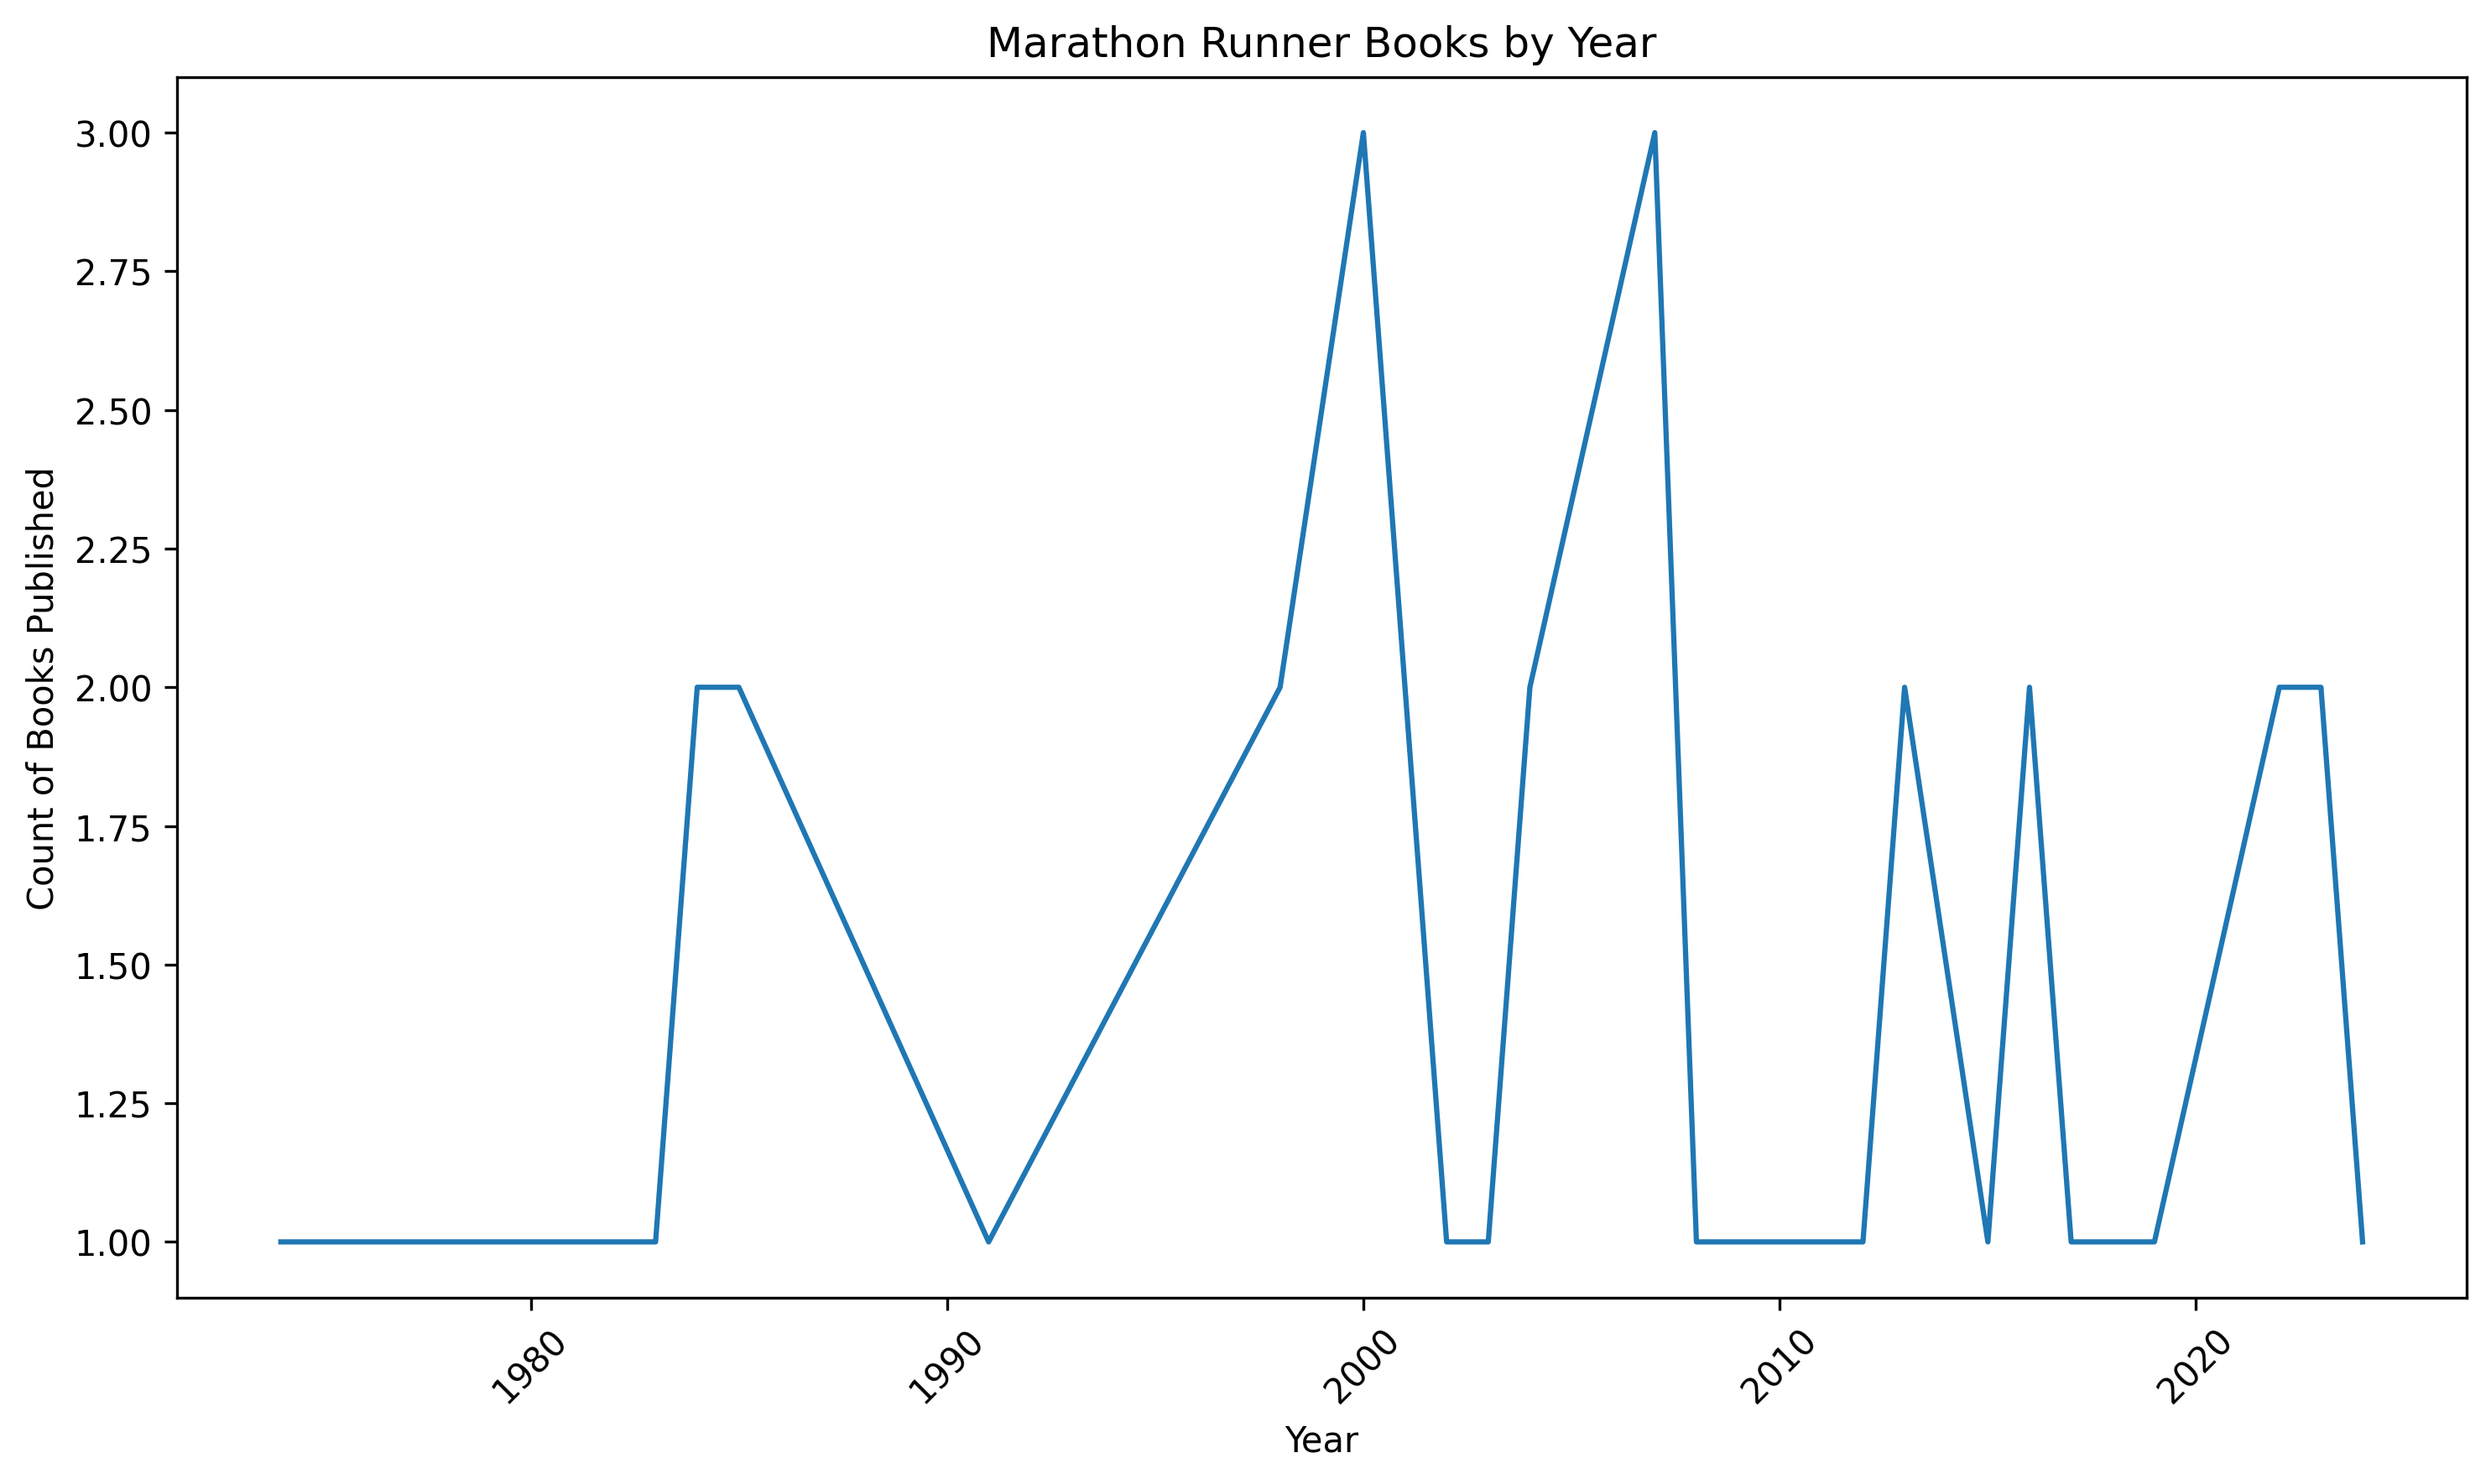

In [12]:
grouped = df.groupby('publish_year')['title'].nunique().reset_index(name='Count')

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(grouped['publish_year'], grouped['Count'])

plt.title('Marathon Runner Books by Year')
plt.xlabel('Year')
plt.ylabel('Count of Books Published')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [13]:
df['Years to Write'] = df['publish_year'] - df['Date'].dt.year
df['Age at Publication'] = df['publish_year'] - df['Date of Birth'].dt.year

df.head(3)

,Rank,Time,Name,Country,Date of Birth,City,Date,title,publish_year,Years to Write,Age at Publication
0,6,2:15:25,Paula Radcliffe,GBR,1973-12-17,London,2003-04-13,Paula Radcliffe,2004,1,31
1,67,2:19:36,Deena Kastor,USA,1973-02-14,London,2006-04-23,Let Your Mind Run,2018,12,45
2,121,2:05:11,Mo Farah,GBR,1983-03-23,Chicago,2018-10-07,Twin Ambitions - My Autobiography,2013,-5,30


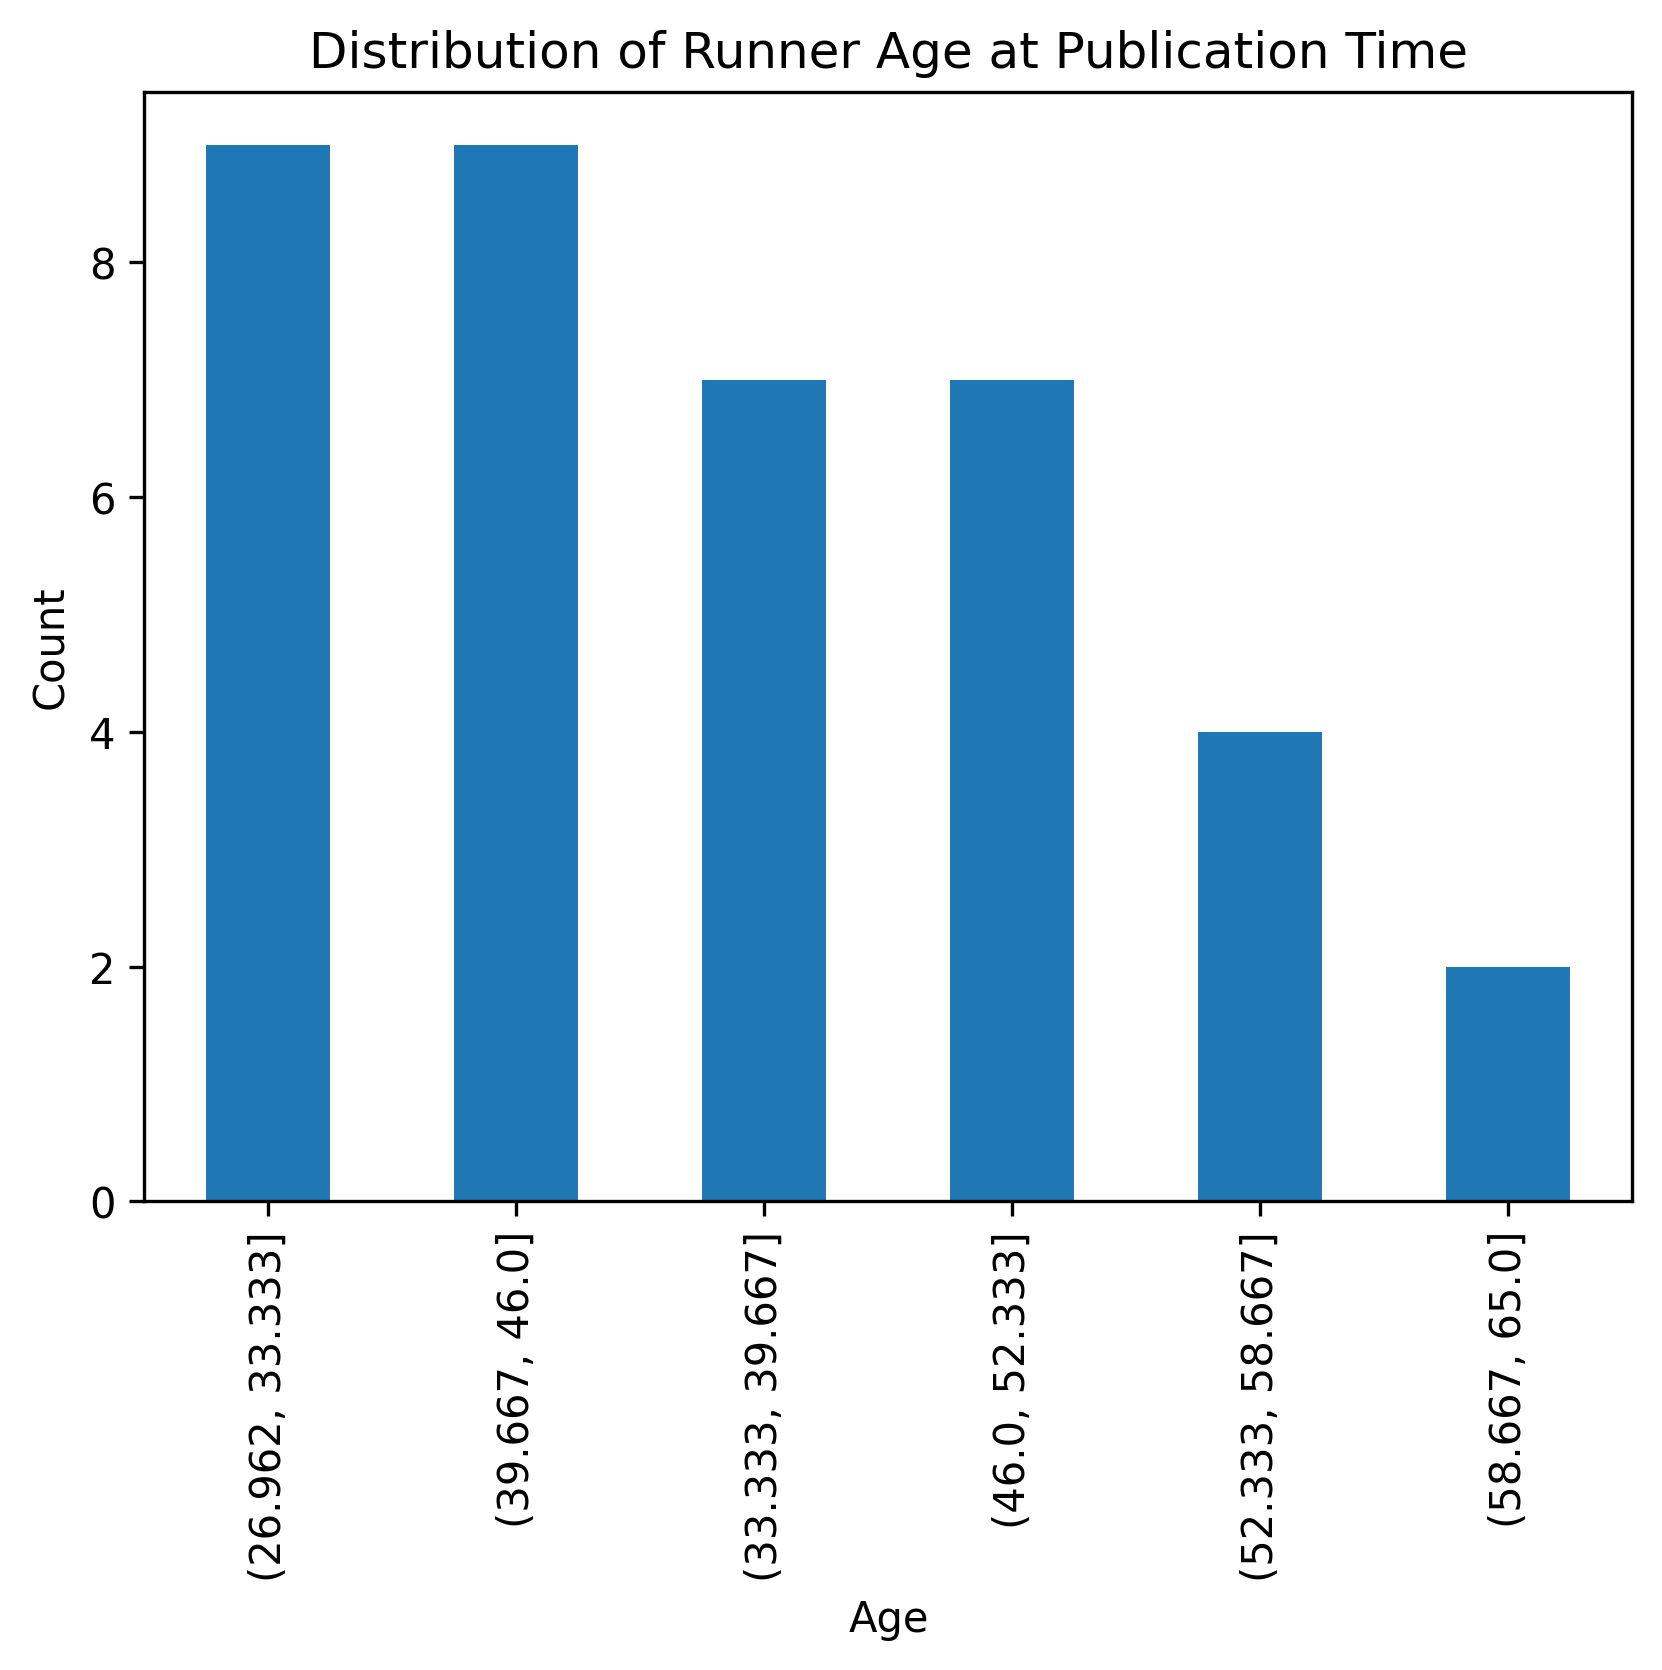

In [14]:
fig, ax = plt.subplots(dpi=300)

df['bin'] = pd.cut(df['Age at Publication'], bins=6)
bin_counts = df['bin'].value_counts()

bin_counts.plot(kind='bar')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Runner Age at Publication Time')

plt.show()

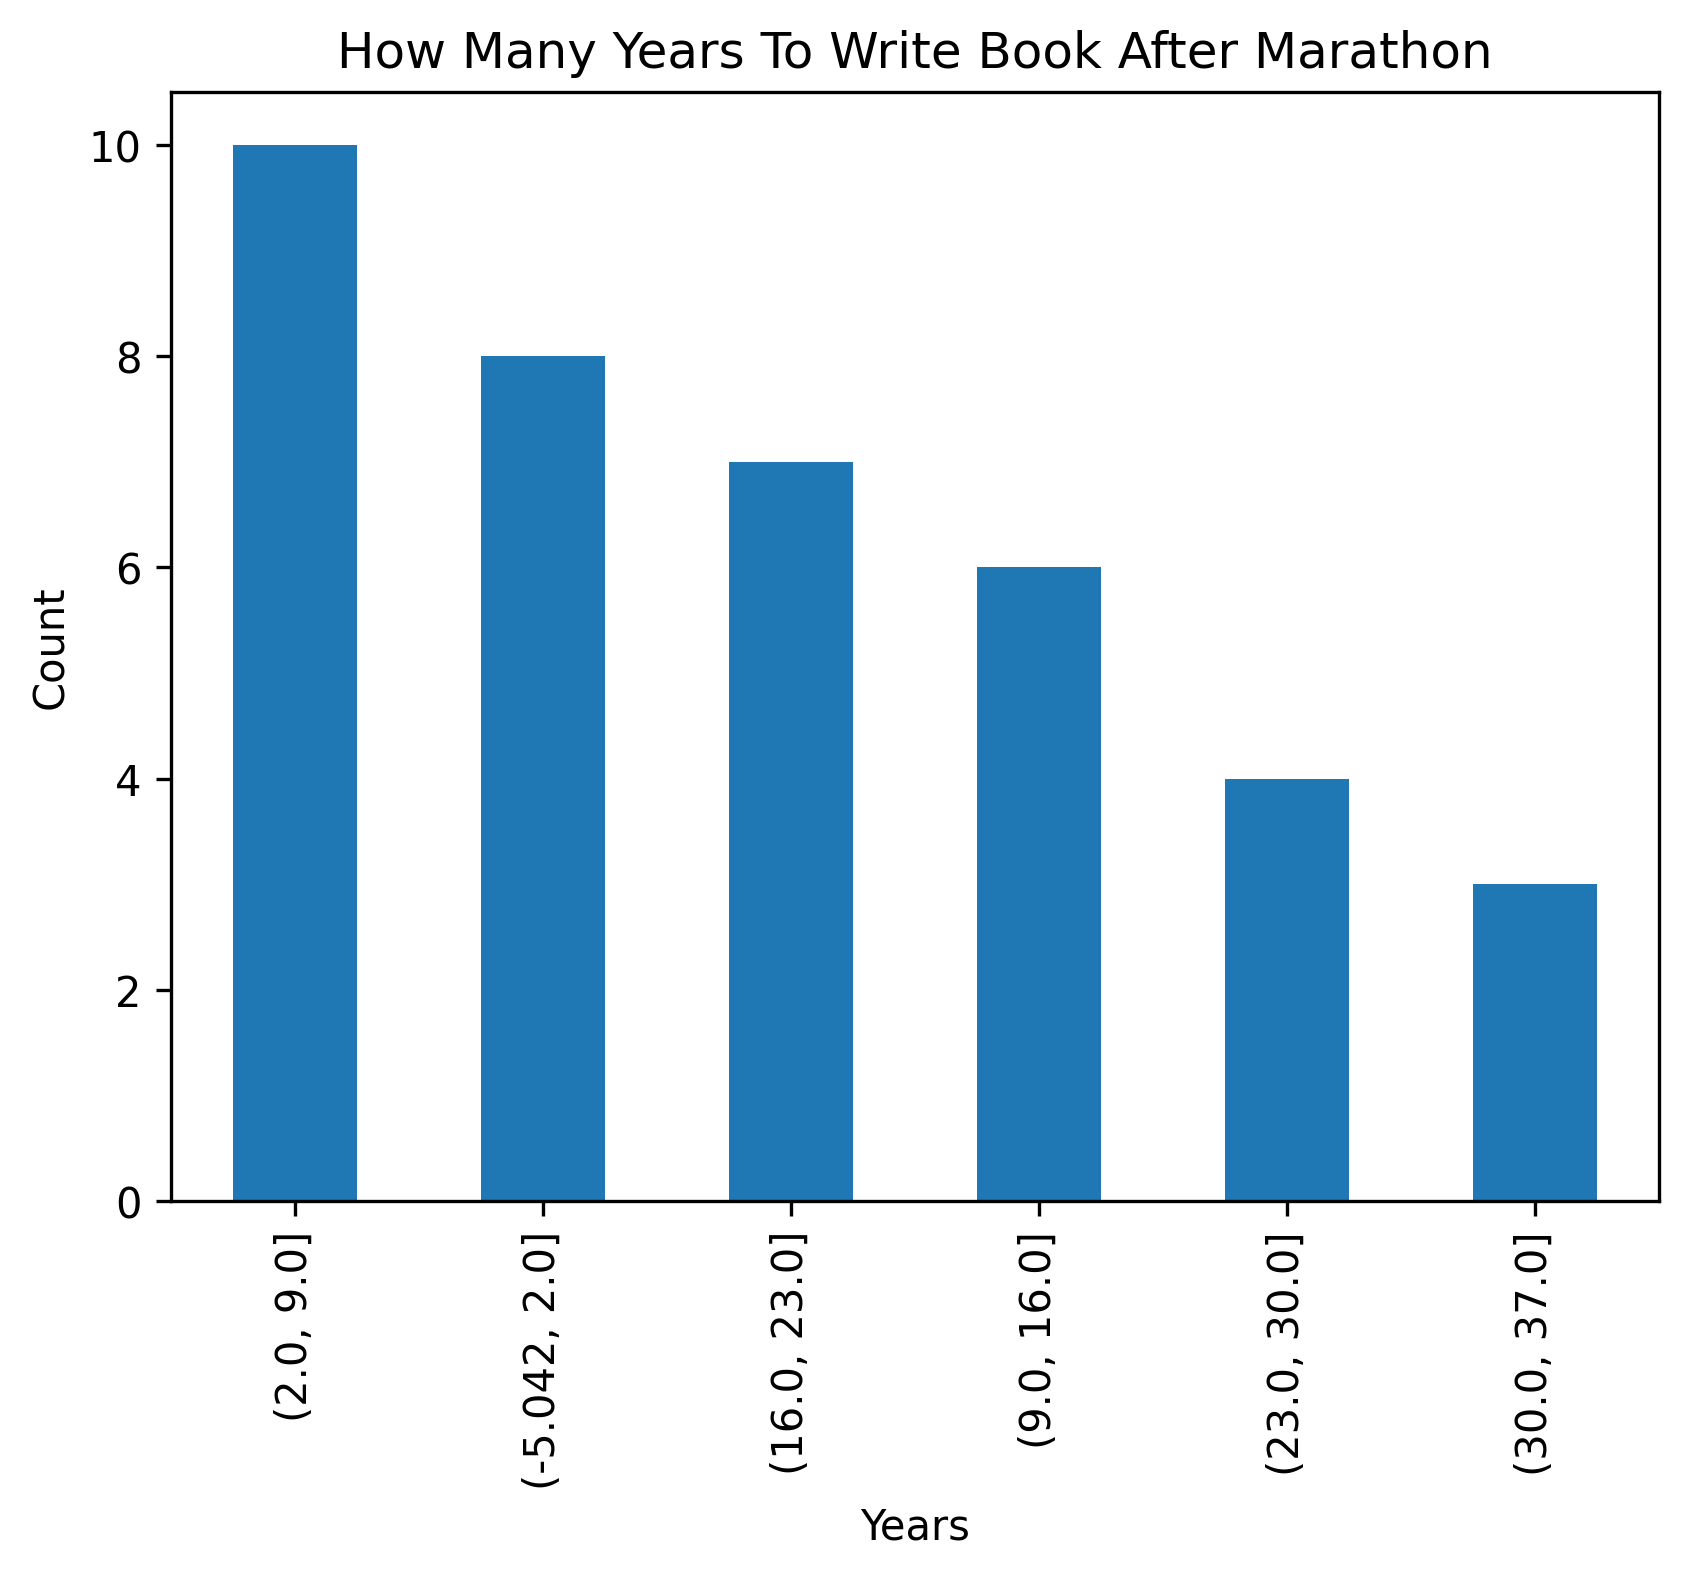

In [15]:
fig, ax = plt.subplots(dpi=300)

df['bin'] = pd.cut(df['Years to Write'], bins=6)
bin_counts = df['bin'].value_counts()

bin_counts.plot(kind='bar')

plt.xlabel('Years')
plt.ylabel('Count')
plt.title('How Many Years To Write Book After Marathon')

plt.show()

In [17]:
df[[
    'Name',
    'title',
    'Years to Write',
]].sort_values(by='Years to Write', ascending=False)

,Name,title,Years to Write
31,Kenny Moore,Bowerman and the Men of Oregon,37
18,Ron Hill,"Manchester Marathons, 1908-2002",33
15,Hugh Jones,Marathons of the World,31
24,Nelson Ndereva,Why I Love Running,28
37,Brad Hudson,Young Runners at the Top,27
36,Mark Coogan,Personal Best Running,27
33,Pete Pfitzinger,Advanced Marathoning,24
19,Dick Beardsley,Staying the Course,23
11,Kim Jones,Dandelion Growing Wild,21
13,Lorraine Moller,On the Wings of Mercury,21


In [19]:
df[[
    'Name',
    'title',
    'Age at Publication',
]].sort_values(by='Age at Publication', ascending=False)

,Name,title,Age at Publication
18,Ron Hill,"Manchester Marathons, 1908-2002",65
31,Kenny Moore,Bowerman and the Men of Oregon,64
15,Hugh Jones,Marathons of the World,58
36,Mark Coogan,Personal Best Running,57
24,Nelson Ndereva,Why I Love Running,57
11,Kim Jones,Dandelion Growing Wild,54
13,Lorraine Moller,On the Wings of Mercury,52
37,Brad Hudson,Young Runners at the Top,51
33,Pete Pfitzinger,Advanced Marathoning,51
16,Bill Rodgers,Complete Idiot's Guide to Jogging and Running,51
